**Author: Christian Camilo Urcuqui López**


The information about the challenge was taken from https://data.birmingham.gov.uk/dataset/purchase-card-transactions

***

Under the Code of Recommended Practice for Local Authorities on Data Transparency, councils are encouraged to publish all corporate purchase card transactions.

We already publish details of all our relevant expenditure of more than £500 within our Payments to Suppliers page, and will continue to do so. However, in the spirit of the Code, the Council started publishing all purchase card transactions, regardless of value, from the April 2014 card statement. The information will be published monthly.

As with our payments to suppliers, we aim to be as transparent as we can, but in some cases we will need to respect information that could be seen as commercially sensitive or where the payment relates to vulnerable young people or adults. In these cases information is withheld as it is personal data. For further information about personal data, please see birmingham.gov.uk/foi.

If you require further information about any of the payments, please contact foi.mailbox@birmingham.gov.uk setting out the details of the payment and what additional information you require. Such request will be handled under the Freedom of Information Act 2000, and the Council aims to be able to provide a response to your query within 20 working days.

PLEASE NOTE - FROM JANUARY 2018 EACH MONTHLY PURCHASE CARD PAYMENTS REPORT WILL BE PUBLISHED AS A STANDALONE DOCUMENT. THE LINK BELOW WILL TAKE YOU DIRECT TO THE LIST OF PUBLISHED STATISTICS FROM WHICH YOU WILL BE ABLE TO EXTRACT THE INFORMATION YOU REQUIRE:
***


According to the website previously cited we have files for each month from april 2014 to january 2018; these datasets are going to have information about Purchase Card Transactions from the Birmingham City Council.

In [1]:
import pandas as pd
import os 
import warnings
warnings.filterwarnings('ignore')

**Table of Contents**

[EDA](#EDA)
| [Exploring](#Exploring)
| [Cleaning](#Cleaning)
| [Conclusions](#Conclusions)
| [Modeling](#Modeling)
| [Results](#Results)

---

# EDA

## Exploring

### 2018

Let's explore the transactions of 2018

In [2]:
path = "D:/Github/Data-Science/Datasets/purchase_card/2018/cusersfinainmndesktoppublish-spend-january-2018.xls"
df = pd.read_excel(path)
df.head()

,TRANS DATE,TRANS VAT DESC,ORIGINAL GROSS AMT,ORIGINAL CUR,BILLING GROSS AMT,BILLING CUR CODE,MERCHANT NAME,CARD NUMBER,TRANS CAC CODE 1,TRANS CAC DESC 1,TRANS CAC CODE 2,TRANS CAC DESC 2,TRANS CAC CODE 3,Directorate
0,2018-01-03,VR,82.20,GBP,82.20,GBP,mrh six ways,************5804,K020,Vehicle Fuel,RVA11,Beeches GOLDD,A00,Adult Social Care and Health
1,2018-02-05,VR,60.00,GBP,60.00,GBP,malthurst limited,************5804,K020,Vehicle Fuel,RVA11,Beeches GOLDD,A00,Adult Social Care and Health
2,2018-01-29,VR,50.00,GBP,50.00,GBP,beeches road servi,************5804,K020,Vehicle Fuel,RVA11,Beeches GOLDD,A00,Adult Social Care and Health
3,2018-01-19,VR,45.00,GBP,45.00,GBP,beeches road servi,************5804,K020,Vehicle Fuel,RVA11,Beeches GOLDD,A00,Adult Social Care and Health
4,2018-01-18,VR,77.49,GBP,77.49,GBP,rontec moseley,************2823,K020,Vehicle Fuel,RV191,Moseley Day Centre,A00,Adult Social Care and Health


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5640 entries, 0 to 5639
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   TRANS DATE          5640 non-null   datetime64[ns]
 1   TRANS VAT DESC      5011 non-null   object        
 2   ORIGINAL GROSS AMT  5640 non-null   float64       
 3   ORIGINAL CUR        5640 non-null   object        
 4   BILLING GROSS AMT   5640 non-null   float64       
 5   BILLING CUR CODE    5640 non-null   object        
 6   MERCHANT NAME       5640 non-null   object        
 7   CARD NUMBER         5640 non-null   object        
 8   TRANS CAC CODE 1    5636 non-null   object        
 9   TRANS CAC DESC 1    5636 non-null   object        
 10  TRANS CAC CODE 2    5632 non-null   object        
 11  TRANS CAC DESC 2    5632 non-null   object        
 12  TRANS CAC CODE 3    5631 non-null   object        
 13  Directorate         5640 non-null   object      

According to the last summary we have some NaN values that need to be process, let's review some of them 

In [4]:
df[df.isna()]

,TRANS DATE,TRANS VAT DESC,ORIGINAL GROSS AMT,ORIGINAL CUR,BILLING GROSS AMT,BILLING CUR CODE,MERCHANT NAME,CARD NUMBER,TRANS CAC CODE 1,TRANS CAC DESC 1,TRANS CAC CODE 2,TRANS CAC DESC 2,TRANS CAC CODE 3,Directorate
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5635,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5636,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5637,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5638,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df[df.isna()].shape

(5640, 14)

In [6]:
df.isna().sum() / df.shape[0]

TRANS DATE            0.000000
TRANS VAT DESC        0.111525
ORIGINAL GROSS AMT    0.000000
ORIGINAL CUR          0.000000
BILLING GROSS AMT     0.000000
BILLING CUR CODE      0.000000
MERCHANT NAME         0.000000
CARD NUMBER           0.000000
TRANS CAC CODE 1      0.000709
TRANS CAC DESC 1      0.000709
TRANS CAC CODE 2      0.001418
TRANS CAC DESC 2      0.001418
TRANS CAC CODE 3      0.001596
Directorate           0.000000
dtype: float64

the last analysis allows us to understand that the 11% of the feauture TRANS VAT DESC has the NaN registers 

### 2017

Let's explore the last months of 2017

*December*

In [7]:
path = "D:/Github/Data-Science/Datasets/purchase_card/2017/"
df_two = pd.read_csv(path+ "open_data_planning_weekly_list.csv")
df_two.head()

,REFERENCE,Category,Received_Date,LOCATION,DEV,Accepted,APPLICANT,AGENT,WARD,geom
0,2018/00188/PA,Householder,11/01/2018,"120 Oakfield Road, Selly Oak, Birmingham, B29 7ED","Replacement doors and windows, external insula...",11/01/2018,"Mr and Mrs M Webb,120 Oakfield Road, Selly Oak...","Architecture For You, 236 Franklin Road, Bourn...",Selly Oak,NaN
1,2017/10761/PA,Advert,18/12/2017,"Arya International Mini Market, 568 Bristol Ro...",Retention of internally illuminated ATM surround,11/01/2018,"Cardtronics UK Ltd T/A Cashzone,PO Box 476, Ha...","Des Ager Design & Planning Consultant, 1 Turne...",Selly Oak,NaN
2,2018/00011/PA,Householder,03/01/2018,"16 Wyvern Grove, Birmingham, B29 6RN",Erection of single storey rear extension,10/01/2018,"Mr J Foxall,16 Wyvern Grove, Birmingham, B29 6RN","Anglian Home Improvements, National Administra...",Selly Oak,NaN
3,2018/00117/PA,Householder,08/01/2018,"9 Naunton Close, Selly Oak, Birmingham, B29 4DX",Erection of two storey front extension,12/01/2018,"Mr Jose Sodre,9 Naunton Close, Selly Oak, Birm...",",",Weoley,NaN
4,2018/00191/PA,Householder,11/01/2018,"145 Lichfield Road, Four Oaks, Sutton Coldfiel...",Erection of two storey side and rear extensions,11/01/2018,"Mr Andrew Haslehurst,145 Lichfield Road, Four ...","K G Bramwell MCIAT, 65 Brookhus Farm Road, Wal...",Sutton Four Oaks,NaN


In [8]:
set(df_two.columns) == set(df.columns)

False

We have something here. The last code allowed me to understand that the feature names are not the same, they need to be processed. 

In [9]:
set(df_two.columns.str.lower()) - set(df.columns.str.lower())

{'accepted',
 'agent',
 'applicant',
 'category',
 'dev',
 'geom',
 'location',
 'received_date',
 'reference',
 'ward'}

we have that the feature names are different between december 2017 and january 2018.

is this the same for december and november in 2017?

In [10]:
path = "D:/Github/Data-Science/Datasets/purchase_card/2017/"
set(pd.read_excel(path+"cusersfinainmndesktoppublish-spend-november-2017-all-directorates.xls").columns.str.lower())- set(pd.read_csv(path+"open_data_planning_weekly_list.csv").columns.str.lower())

{'billing cur code',
 'billing gross amt',
 'card number',
 'directorate',
 'merchant name',
 'original cur',
 'original gross amt',
 'trans cac code 1',
 'trans cac code 2',
 'trans cac code 3',
 'trans cac desc 1',
 'trans cac desc 2',
 'trans date',
 'trans vat desc'}

is the same thing happens in november and october?

In [11]:
path = "D:/Github/Data-Science/Datasets/purchase_card/2017/"
set(pd.read_excel(path+"cusersfinainmndesktoppublish-spend-october-2017-all-directorates.xls").columns.str.lower())- set(pd.read_excel(path+"cusersfinainmndesktoppublish-spend-november-2017-all-directorates.xls").columns.str.lower())

{'directorates'}

According to these months we have some problems about the integrity of the feature names.

is the same thing happens in september and october?

In [12]:
set(pd.read_excel(path+"cusersfinainmndesktoppublish-spend-october-2017-all-directorates.xls").columns.str.lower())- set(pd.read_excel(path+"cusersfinainmndesktoppublish-spend-sept-2017.xls").columns.str.lower())

{'directorates'}

is the same thing happens in september and august?

In [13]:
set(pd.read_excel(path+"cusersfinainmndesktoppublish-spend-august-2017-all-directorates.xls").columns.str.lower())- set(pd.read_excel(path+"cusersfinainmndesktoppublish-spend-sept-2017.xls").columns.str.lower())

set()

the last two months are good 

In [14]:
set(pd.read_excel(path+"cusersfinainmndesktoppublish-spend-august-2017-all-directorates.xls").columns.str.lower())- set(pd.read_excel(path+"cusersfinainmndesktoppublish-spend-july-2017.xls").columns.str.lower())

set()

*NaN analysis in 2017*

In [16]:
# december
df_two.isna().sum()

REFERENCE          0
Category           0
Received_Date      0
LOCATION           0
DEV                0
Accepted           0
APPLICANT          0
AGENT              0
WARD               0
geom             151
dtype: int64

In [17]:
pd.read_excel(path+"cusersfinainmndesktoppublish-spend-november-2017-all-directorates.xls").isna().sum()

TRANS DATE              0
TRANS VAT DESC        562
ORIGINAL GROSS AMT      0
ORIGINAL CUR            0
BILLING GROSS AMT       0
BILLING CUR CODE        0
MERCHANT NAME           0
CARD NUMBER             0
TRANS CAC CODE 1       11
TRANS CAC DESC 1       11
TRANS CAC CODE 2       21
TRANS CAC DESC 2       21
TRANS CAC CODE 3       19
Directorate             0
dtype: int64

### 2016

In [18]:
path = "D:/Github/Data-Science/Datasets/purchase_card/2016/"
df = pd.read_excel(path+ "publishspendfebruary2016.xls")
df.head()

,TRANS DATE,TRANS VAT DESC,ORIGINAL GROSS AMT,MERCHANT NAME,CARD NUMBER,TRANS CAC CODE 1,TRANS CAC DESC 1,TRANS CAC CODE 2,TRANS CAC DESC 2,TRANS CAC CODE 3,Directorate
0,2016-02-04,VR,46.52,tex sussex sstn,************8738,K020,Vehicle Fuel,RV12T,"Shakti Elders Dce, 73 Conybere St, B12",A00,Adult & Communities
1,2016-02-08,VR,58.73,tex sussex sstn,************8738,K020,Vehicle Fuel,RV12T,"Shakti Elders Dce, 73 Conybere St, B12",A00,Adult & Communities
2,2016-02-11,VR,50.35,tex sussex sstn,************8738,K020,Vehicle Fuel,RV12T,"Shakti Elders Dce, 73 Conybere St, B12",A00,Adult & Communities
3,2016-02-29,VR,49.00,tex sussex sstn,************8738,K020,Vehicle Fuel,RV12T,"Shakti Elders Dce, 73 Conybere St, B12",A00,Adult & Communities
4,2016-02-09,VR,63.00,malthurst petroleu,************5804,K020,Vehicle Fuel,RVA12,Enablement Tyburn Rd,A00,Adult & Communities


In [21]:
path = "D:/Github/Data-Science/Datasets/purchase_card/"
set(pd.read_excel(path+"2017/testing/cusersfinainmndesktoppublish-copy-january-2017.xls").columns.str.lower())- set(pd.read_excel(path+"2016/publishspendfebruary2016.xls").columns.str.lower())

{'billing cur code', 'billing gross amt', 'original cur'}

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4623 entries, 0 to 4622
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   TRANS DATE          4623 non-null   datetime64[ns]
 1   TRANS VAT DESC      4282 non-null   object        
 2   ORIGINAL GROSS AMT  4623 non-null   float64       
 3   MERCHANT NAME       4623 non-null   object        
 4   CARD NUMBER         4623 non-null   object        
 5   TRANS CAC CODE 1    4620 non-null   object        
 6   TRANS CAC DESC 1    4620 non-null   object        
 7   TRANS CAC CODE 2    4610 non-null   object        
 8   TRANS CAC DESC 2    4610 non-null   object        
 9   TRANS CAC CODE 3    4613 non-null   object        
 10  Directorate         4623 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 397.4+ KB


### 2015

In [23]:
path = "D:/Github/Data-Science/Datasets/purchase_card/"
set(pd.read_excel(path+"2017/cusersfinainmndesktoppublish-spend-august-2017-all-directorates.xls").columns.str.lower())- set(pd.read_excel(path+"2016/train/purchaseccardtransactionsjanuary2015.xls").columns.str.lower())

{'billing cur code', 'billing gross amt', 'original cur'}

In [24]:
pd.read_excel(path+"2016/train/purchaseccardtransactionsjanuary2015.xls").columns.str.lower()

Index(['trans date', 'trans vat desc', 'original gross amt', 'merchant name',
       'card number', 'trans cac code 1', 'trans cac desc 1',
       'trans cac code 2', 'trans cac desc 2', 'trans cac code 3',
       'directorate'],
      dtype='object')

In [25]:
pd.read_excel(path+"2016/train/purchaseccardtransactionsjanuary2015.xls").head()

,TRANS DATE,TRANS VAT DESC,ORIGINAL GROSS AMT,MERCHANT NAME,CARD NUMBER,TRANS CAC CODE 1,TRANS CAC DESC 1,TRANS CAC CODE 2,TRANS CAC DESC 2,TRANS CAC CODE 3,Directorate
0,2015-01-08,VR,52.84,shell kings 587,************5770,K020,Vehicle Fuel,RV12N,African-Caribbean DC,A00,Adult & Communities
1,2015-01-21,VR,10.00,shell kings 587,************5770,K020,Vehicle Fuel,RV12N,African-Caribbean DC,A00,Adult & Communities
2,2015-01-22,VR,20.01,tesco pay at pump 4203,************5770,K020,Vehicle Fuel,RV12N,African-Caribbean DC,A00,Adult & Communities
3,2015-01-23,VR,57.96,shell kings 587,************5770,K020,Vehicle Fuel,RV12N,African-Caribbean DC,A00,Adult & Communities
4,2015-01-07,VR,60.50,shell corrida 108,************8143,K020,Vehicle Fuel,RV14R,Mobile Night Care Service,A00,Adult & Communities


In [26]:
pd.read_excel(path+"2016/train/purchaseccardtransactionsjanuary2015.xls")[["TRANS DATE", "ORIGINAL GROSS AMT"]]

,TRANS DATE,ORIGINAL GROSS AMT
0,2015-01-08,52.84
1,2015-01-21,10.00
2,2015-01-22,20.01
3,2015-01-23,57.96
4,2015-01-07,60.50
...,...,...
4786,2015-01-21,43.92
4787,2015-01-06,71.55
4788,2015-02-02,75.00
4789,2015-01-12,11.86


## Cleaning

*NaN*

In [27]:
df.isna().sum() / df.shape[0]

TRANS DATE            0.000000
TRANS VAT DESC        0.073762
ORIGINAL GROSS AMT    0.000000
MERCHANT NAME         0.000000
CARD NUMBER           0.000000
TRANS CAC CODE 1      0.000649
TRANS CAC DESC 1      0.000649
TRANS CAC CODE 2      0.002812
TRANS CAC DESC 2      0.002812
TRANS CAC CODE 3      0.002163
Directorate           0.000000
dtype: float64

In [28]:
df.columns = df.columns.str.replace(" ", "_").str.lower()

In [29]:
df.columns

Index(['trans_date', 'trans_vat_desc', 'original_gross_amt', 'merchant_name',
       'card_number', 'trans_cac_code_1', 'trans_cac_desc_1',
       'trans_cac_code_2', 'trans_cac_desc_2', 'trans_cac_code_3',
       'directorate'],
      dtype='object')

In [30]:
df.loc[df.trans_vat_desc.isna()]

,trans_date,trans_vat_desc,original_gross_amt,merchant_name,card_number,trans_cac_code_1,trans_cac_desc_1,trans_cac_code_2,trans_cac_desc_2,trans_cac_code_3,directorate
13,2016-02-04,NaN,473.65,travelodge website,************6720,N060,Other Third Parties,RJACG,H/Less Temporary Accomdtn Team,A00,Adult & Communities
14,2016-02-04,NaN,595.25,travelodge website,************6720,N060,Other Third Parties,RJACG,H/Less Temporary Accomdtn Team,A00,Adult & Communities
15,2016-02-04,NaN,652.25,travelodge website,************6720,N060,Other Third Parties,RJACG,H/Less Temporary Accomdtn Team,A00,Adult & Communities
16,2016-02-04,NaN,595.30,travelodge website,************6720,N060,Other Third Parties,RJACG,H/Less Temporary Accomdtn Team,A00,Adult & Communities
17,2016-02-04,NaN,550.25,travelodge website,************6720,N060,Other Third Parties,RJACG,H/Less Temporary Accomdtn Team,A00,Adult & Communities
...,...,...,...,...,...,...,...,...,...,...,...
4166,2016-02-10,NaN,822.00,dvsa,************9223,N070,Other Agencies,RUHVM,Headquarters-Vehicle Maintenance,A00,Local Services
4168,2016-02-17,NaN,803.80,dvsa,************9223,N070,Other Agencies,RUHVM,Headquarters-Vehicle Maintenance,A00,Local Services
4169,2016-02-23,NaN,775.80,dvsa,************9223,N070,Other Agencies,RUHVM,Headquarters-Vehicle Maintenance,A00,Local Services
4170,2016-02-24,NaN,758.60,dvsa,************9223,K050,Vehicle Excise Lics,RUHVM,Headquarters-Vehicle Maintenance,A00,Local Services


In [31]:
df.trans_vat_desc.value_counts()

VR    2179
VZ    2098
VL       2
VE       2
VS       1
Name: trans_vat_desc, dtype: int64

In [32]:
df.loc[df.trans_cac_code_1.isna()]

,trans_date,trans_vat_desc,original_gross_amt,merchant_name,card_number,trans_cac_code_1,trans_cac_desc_1,trans_cac_code_2,trans_cac_desc_2,trans_cac_code_3,directorate
972,2016-02-16,VR,72.30,hawthorn service station,************6964,NaN,NaN,RV013,"Warwick Hse HLDC, 938 Warwick Rd B27",A00,CYP&F
973,2016-03-01,VR,52.97,nochex-sensory educati,************6964,NaN,NaN,RV013,"Warwick Hse HLDC, 938 Warwick Rd B27",A00,CYP&F
3616,2016-02-29,VZ,74.63,asda home shopping,************3564,NaN,NaN,REACB,Calshot Junior,A00,CYP&F SCHOOLS


In [33]:
path = "D:/Github/Data-Science/Datasets/purchase_card/2016/"
df = pd.read_excel(path+ "publishspendmarch2016.xls")
df.head()

,TRANS DATE,TRANS VAT DESC,ORIGINAL GROSS AMT,MERCHANT NAME,CARD NUMBER,TRANS CAC CODE 1,TRANS CAC DESC 1,TRANS CAC CODE 2,TRANS CAC DESC 2,TRANS CAC CODE 3,Directorate
0,2016-03-08,VR,58.0,tex sussex sstn,************8738,K020,Vehicle Fuel,RV12T,"Shakti Elders Dce, 73 Conybere St, B12",A00,Adult & Communities
1,2016-03-23,VR,45.0,malthurst petroleu,************5804,K020,Vehicle Fuel,RVA12,Enablement Tyburn Rd,A00,Adult & Communities
2,2016-03-18,VR,55.0,malthurst petroleu,************5804,K020,Vehicle Fuel,RVA12,Enablement Tyburn Rd,A00,Adult & Communities
3,2016-03-10,VR,30.0,malthurst petroleu,************5804,K020,Vehicle Fuel,RVA12,Enablement Tyburn Rd,A00,Adult & Communities
4,2016-03-04,VR,15.0,malthurst petroleu,************5804,K020,Vehicle Fuel,RVA12,Enablement Tyburn Rd,A00,Adult & Communities


In [34]:
df.isna().sum() / df.shape[0]

TRANS DATE            0.000000
TRANS VAT DESC        0.067017
ORIGINAL GROSS AMT    0.000000
MERCHANT NAME         0.000000
CARD NUMBER           0.000000
TRANS CAC CODE 1      0.000554
TRANS CAC DESC 1      0.000554
TRANS CAC CODE 2      0.000000
TRANS CAC DESC 2      0.000000
TRANS CAC CODE 3      0.000000
Directorate           0.000000
dtype: float64

Now, with the last idea that we have missing values to preprocess I'm going to get all the data from 2016 to know what the dimension is of NaN

In [37]:
import os 
df = pd.DataFrame()
path = "D:/Github/Data-Science/Datasets/purchase_card/2016/train/"
for entry in os.listdir(path):
    df = pd.concat([df, pd.read_excel(path + entry).rename({"Directorate":"Directorates"},axis=1)])

In [38]:
df.columns = df.columns.str.replace(" ", "_").str.lower()

In [39]:
df.head()

,trans_date,trans_vat_desc,original_gross_amt,original_cur,billing_gross_amt,billing_cur_code,merchant_name,card_number,trans_cac_code_1,trans_cac_desc_1,trans_cac_code_2,trans_cac_desc_2,trans_cac_code_3,directorates,trans_tax_amt,billing_cur_code.1,directorate_,unnamed:_10
0,2017-01-03,VR,72.61,GBP,72.61,GBP,shell kings 587,************5770,K020,Vehicle Fuel,RV12N,African-Caribbean DC,A00,Adult & Communities,NaN,NaN,NaN,NaN
1,2017-01-24,VR,85.51,GBP,85.51,GBP,shell fiveways 387,************1147,K020,Vehicle Fuel,RV1K2,Elders Group - Ladywood,A00,Adult & Communities,NaN,NaN,NaN,NaN
2,2017-02-01,VR,10.09,GBP,10.09,GBP,shell fiveways 387,************1147,K020,Vehicle Fuel,RV1K2,Elders Group - Ladywood,A00,Adult & Communities,NaN,NaN,NaN,NaN
3,2017-01-04,VR,20.00,GBP,20.00,GBP,mibsons service st,************5804,K020,Vehicle Fuel,RVA12,Enablement Tyburn Rd,A00,Adult & Communities,NaN,NaN,NaN,NaN
4,2017-01-05,VR,50.00,GBP,50.00,GBP,malthurst petroleu,************5804,K020,Vehicle Fuel,RVA12,Enablement Tyburn Rd,A00,Adult & Communities,NaN,NaN,NaN,NaN


In [40]:
df.isna().sum() / df.shape[0]

trans_date            0.000007
trans_vat_desc        0.058559
original_gross_amt    0.000007
original_cur          0.666747
billing_gross_amt     0.666747
billing_cur_code      0.666747
merchant_name         0.000007
card_number           0.000007
trans_cac_code_1      0.000686
trans_cac_desc_1      0.000686
trans_cac_code_2      0.001502
trans_cac_desc_2      0.001502
trans_cac_code_3      0.001866
directorates          0.046357
trans_tax_amt         0.968464
billing_cur_code.1    0.968464
directorate_          0.985858
unnamed:_10           0.972847
dtype: float64

I'm going to filter all the NaN in trans_date

In [41]:
df = df[df.trans_date.isna() != True].copy()

In [42]:
df = df.set_axis(df.trans_date, axis=0).drop(["trans_date"], axis=1).copy()

I would like to see the distributon of original_gross_amt feature

In [43]:
df.original_gross_amt.describe()

count    145801.000000
mean        175.822571
std        2202.602452
min     -486980.090000
25%          12.800000
50%          40.750000
75%          95.000000
max      280102.230000
Name: original_gross_amt, dtype: float64

<AxesSubplot:xlabel='original_gross_amt'>

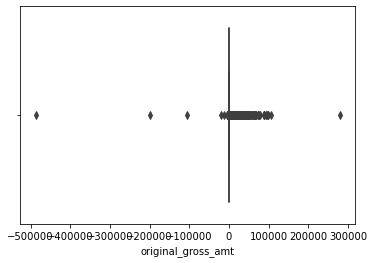

In [44]:
import seaborn as sns

sns.boxplot(df.original_gross_amt)

In [45]:
"Negative values from {}".format((df[df.original_gross_amt <0].shape[0] / df.shape[0]) * 100)

'Negative values from 2.9622567746448927'

we have something here related with the negative values

In [46]:
df = df.loc[df.original_gross_amt > 0, :].copy()

<AxesSubplot:xlabel='original_gross_amt'>

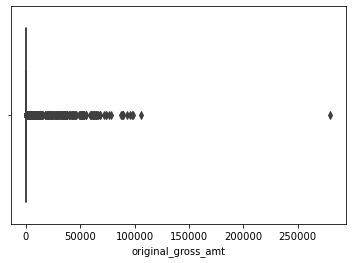

In [47]:
import seaborn as sns

sns.boxplot(df.original_gross_amt)

In [48]:
"Negative values from {}".format((df[df.original_gross_amt <0].shape[0] / df.shape[0]) * 100)

'Negative values from 0.0'

In [49]:
df[df.original_gross_amt <0].shape[0]

0

***

In [2]:
import pandas as pd

def preprocess(df):
    try:
        
        df.columns = df.columns.str.replace(" ", "_").str.lower()
        df = df[df.trans_date.isna() != True].copy()
        df = df.set_axis(df.trans_date, axis=0).drop(["trans_date"], axis=1).copy()
        df = df.loc[df.original_gross_amt > 0, :].copy()
    except Exception as e:
        print(e)
        pass
    return df

In [3]:
import os 

def load_datasets(path):
    df = pd.DataFrame()
    try:        
        for entry in os.listdir(path):
            df = pd.concat([df, pd.read_excel(path + entry).rename({"Directorate":"Directorates"},axis=1)[["TRANS DATE", "ORIGINAL GROSS AMT"]]])
    except Exception as e:
        print(entry)
        print(pd.read_csv(path + entry).rename({"Directorate":"Directorates"},axis=1).columns)
        df = pd.concat([df, pd.read_csv(path + entry).rename({"Directorate":"Directorates"},axis=1)[["TRANS DATE", "ORIGINAL GROSS AMT"]]])
        pass                
    return df

***

## Explore

In [4]:
path = "D:/Github/Data-Science/Datasets/purchase_card/2016/train/"
df = load_datasets(path)
df = preprocess(df)
df.head(3)

,original_gross_amt
trans_date,
2017-01-03,72.61
2017-01-24,85.51
2017-02-01,10.09


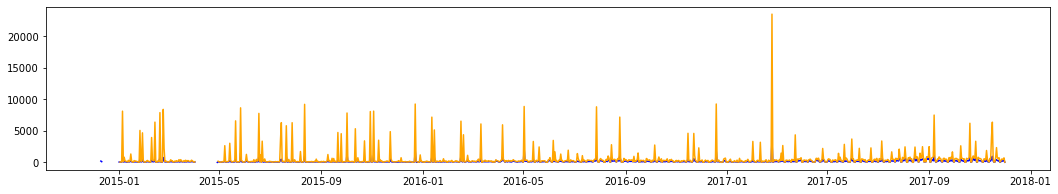

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,3))
plt.plot(df.original_gross_amt.resample(rule='D').mean(), color="blue")
plt.plot(df.original_gross_amt.resample(rule='D').std(), color="orange")

we have some triggers during the data that might show anomalies.

### Conclusions 

+ We have feature names in some datasets that are not same.
+ We have NaN to preprocess
+ We erased the negative values from ORIGINAL GROSS AMT feature because it has 3% from the total information
+ The dataset does not present information about real anomalies, nevertheless, we have some triggers during the data that might show anomalies. 

## Modeling

My training set are going to be integrated from 2015 to 2017; morevoer, the test set is going to have the months of 2017.

In [6]:
path = "D:/Github/Data-Science/Datasets/purchase_card/2017/testing/"
df_test = load_datasets(path)
df_test = preprocess(df_test)
df_test.head(3)

,original_gross_amt
trans_date,
2017-01-03,72.61
2017-01-24,85.51
2017-02-01,10.09


In [7]:
print("training shape {} / days".format(df.original_gross_amt.resample(rule='D').mean().shape[0]))
print("testing shape {} / days".format(df_test.original_gross_amt.resample(rule='D').mean().shape[0]))

training shape 1099 / days
testing shape 94 / days


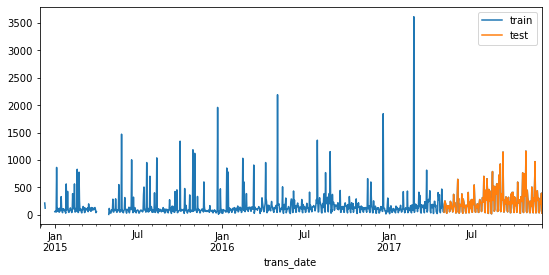

In [8]:
fig, ax=plt.subplots(figsize=(9, 4))
df.original_gross_amt.resample(rule='D').mean().plot(ax=ax, label='train')
df.original_gross_amt.resample(rule='D').mean()["2017-05":].plot(ax=ax, label='test')
ax.legend();

In [9]:
y_train = df['original_gross_amt'].resample('D').mean()

In [10]:
import numpy as np
y_train.replace(np.nan, 0, inplace=True)

In [11]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

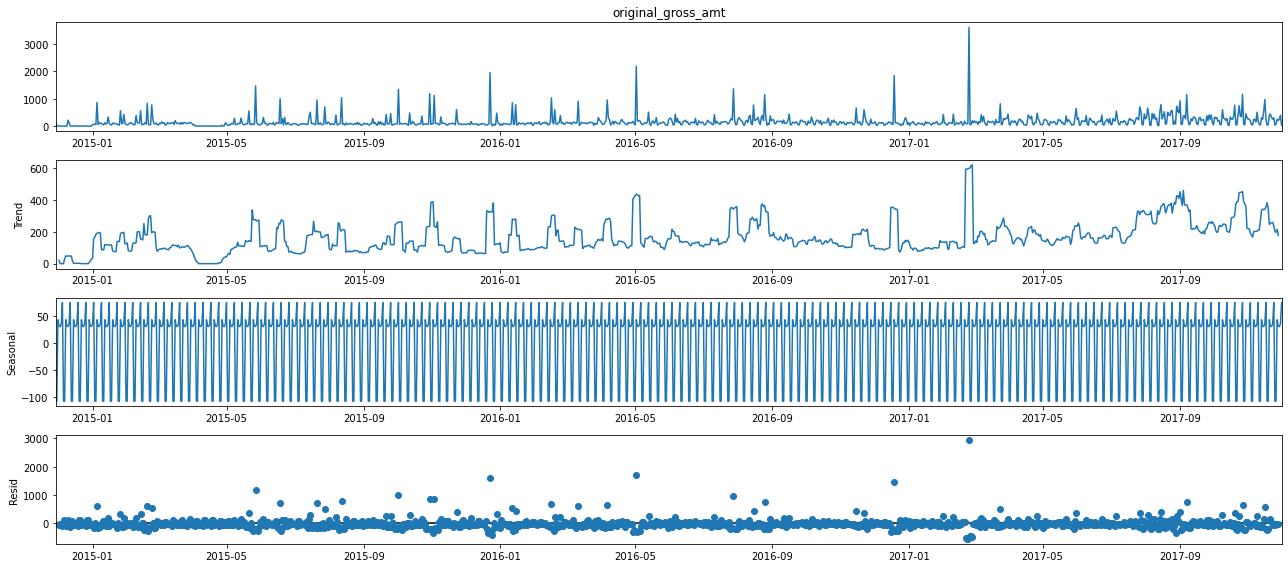

In [12]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y_train, model='additive')
fig = decomposition.plot()
plt.show()

In [13]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [14]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}365 - AIC:{}'.format(param, param_seasonal, results.aic))
        except Exception as e:
            print(e)
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)365 - AIC:15491.235950268334
ARIMA(0, 0, 0)x(0, 0, 1, 12)365 - AIC:15259.662083259873
ARIMA(0, 0, 0)x(0, 1, 0, 12)365 - AIC:15655.86810476339
ARIMA(0, 0, 0)x(0, 1, 1, 12)365 - AIC:14754.804576592524
ARIMA(0, 0, 0)x(1, 0, 0, 12)365 - AIC:15228.135619933639
ARIMA(0, 0, 0)x(1, 0, 1, 12)365 - AIC:14898.295367078019
ARIMA(0, 0, 0)x(1, 1, 0, 12)365 - AIC:15142.556459888925
ARIMA(0, 0, 0)x(1, 1, 1, 12)365 - AIC:14751.90442979738
ARIMA(0, 0, 1)x(0, 0, 0, 12)365 - AIC:15356.161022676879
ARIMA(0, 0, 1)x(0, 0, 1, 12)365 - AIC:15172.37069271264
ARIMA(0, 0, 1)x(0, 1, 0, 12)365 - AIC:15644.455217465409
ARIMA(0, 0, 1)x(0, 1, 1, 12)365 - AIC:14741.193519351847
ARIMA(0, 0, 1)x(1, 0, 0, 12)365 - AIC:15181.93943221631
ARIMA(0, 0, 1)x(1, 0, 1, 12)365 - AIC:14886.313775916158
ARIMA(0, 0, 1)x(1, 1, 0, 12)365 - AIC:15143.417105854734
ARIMA(0, 0, 1)x(1, 1, 1, 12)365 - AIC:14737.86282469829
ARIMA(0, 1, 0)x(0, 0, 0, 12)365 - AIC:15702.328880656012
ARIMA(0, 1, 0)x(0, 0, 1, 12)365 - AI

C:\Users\Usuario\Anaconda3\envs\IA\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 0, 12)365 - AIC:15007.328486390332
ARIMA(1, 0, 1)x(0, 0, 1, 12)365 - AIC:14849.070966701958
ARIMA(1, 0, 1)x(0, 1, 0, 12)365 - AIC:15596.666151707148
ARIMA(1, 0, 1)x(0, 1, 1, 12)365 - AIC:14723.345804142667
ARIMA(1, 0, 1)x(1, 0, 0, 12)365 - AIC:14861.939976016318
ARIMA(1, 0, 1)x(1, 0, 1, 12)365 - AIC:14851.007858810255
ARIMA(1, 0, 1)x(1, 1, 0, 12)365 - AIC:15105.955472621426
ARIMA(1, 0, 1)x(1, 1, 1, 12)365 - AIC:14717.702376911406
ARIMA(1, 1, 0)x(0, 0, 0, 12)365 - AIC:15446.068812698593
ARIMA(1, 1, 0)x(0, 0, 1, 12)365 - AIC:15276.529533627083
ARIMA(1, 1, 0)x(0, 1, 0, 12)365 - AIC:16151.916436654326
ARIMA(1, 1, 0)x(0, 1, 1, 12)365 - AIC:15171.819998778754
ARIMA(1, 1, 0)x(1, 0, 0, 12)365 - AIC:15276.641000394953
ARIMA(1, 1, 0)x(1, 0, 1, 12)365 - AIC:15278.508405894601
ARIMA(1, 1, 0)x(1, 1, 0, 12)365 - AIC:15598.035954073435
ARIMA(1, 1, 0)x(1, 1, 1, 12)365 - AIC:15159.860704742046
ARIMA(1, 1, 1)x(0, 0, 0, 12)365 - AIC:14976.99833874876
ARIMA(1, 1, 1)x(0, 0, 1, 12)365 

In [15]:
# ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:14706.550736303314

mod = sm.tsa.statespace.SARIMAX(y_train,
                                order=(0, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9856      0.006   -154.900      0.000      -0.998      -0.973
ar.S.L12      -0.0752      0.047     -1.605      0.108      -0.167       0.017
ma.S.L12      -1.0000      0.010   -101.018      0.000      -1.019      -0.981
sigma2      5.026e+04   1.97e-07   2.55e+11      0.000    5.03e+04    5.03e+04


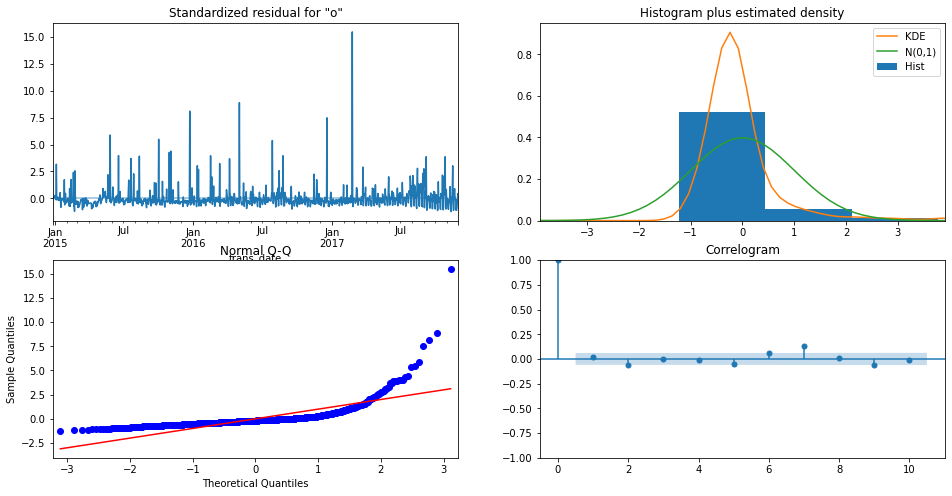

In [16]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [17]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()

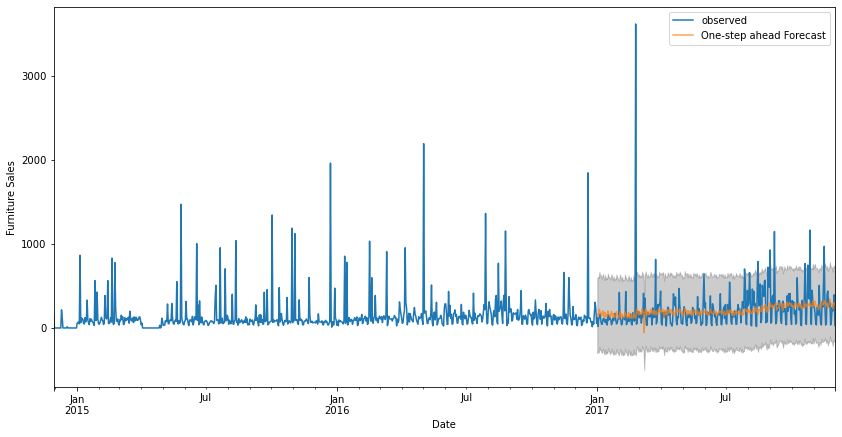

In [18]:
ax = y_train.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [19]:
y_forecasted = pred.predicted_mean
y_truth = y_train['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))

The Mean Squared Error is 66379.73


***

In [20]:
from sklearn.svm import OneClassSVM

clf = OneClassSVM(gamma='auto').fit(y_train['2015-01-01':'2015-12-31'].values.reshape(1, -1))
clf.predict(y_train['2016-01-01':"2016-12-30"].values.reshape(1, -1))

array([-1], dtype=int64)

# Results

+ According to the first experiment a model based on Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors was proposed; the model presents a MSE of 66379.73
+ An OneClassSVM model was proposed to detect outliers (anomalies) using the data, according to the experiment in 2016 was presented one transaction.